# Tilt (https://github.com/takintilo/tilt)

## Part 1

I held the phone still and took measurements from the accelerometer and gyroscope for one minute, which resulted in 536 readings. By taking the average reading, I found the following to be the bias/noise:

| | accelerometer | gyroscope |
| --- | --- | --- |
| x | -0.305250467 | 7.13E-05 |
| y | -0.142084112 | -1.33E-04 |
| z | 10.06681121 | -7.50E-06 |

## Part 2

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
g = 9.80665
b = 0.98

In [74]:
raw_data = pd.read_csv("5min.csv")
raw_data = raw_data[:2088]

In [75]:
tilts = pd.DataFrame()
tilts["timestamp"] = raw_data["timestamp"]
tilts['dt'] = raw_data["timestamp"] - raw_data["timestamp"].shift(1)
tilts['accel'] = np.arcsin(raw_data["accel_y"] / g)
tilts['gyro_unsummed'] = raw_data["gyro_x"] * tilts["dt"]
tilts['gyro'] = tilts["gyro_unsummed"].cumsum()
tilts['comp'] = b * tilts["gyro"] + (1-b) * tilts["accel"]

In [76]:
sns.set_theme()


In [79]:
tilts_plot = tilts.melt("timestamp", value_vars=["accel", "gyro", "comp"], var_name="type", value_name="tilt angle")

Text(0.5, 1.0, 'tilt as measured by accelerometer, gyroscope, and complementary filter')

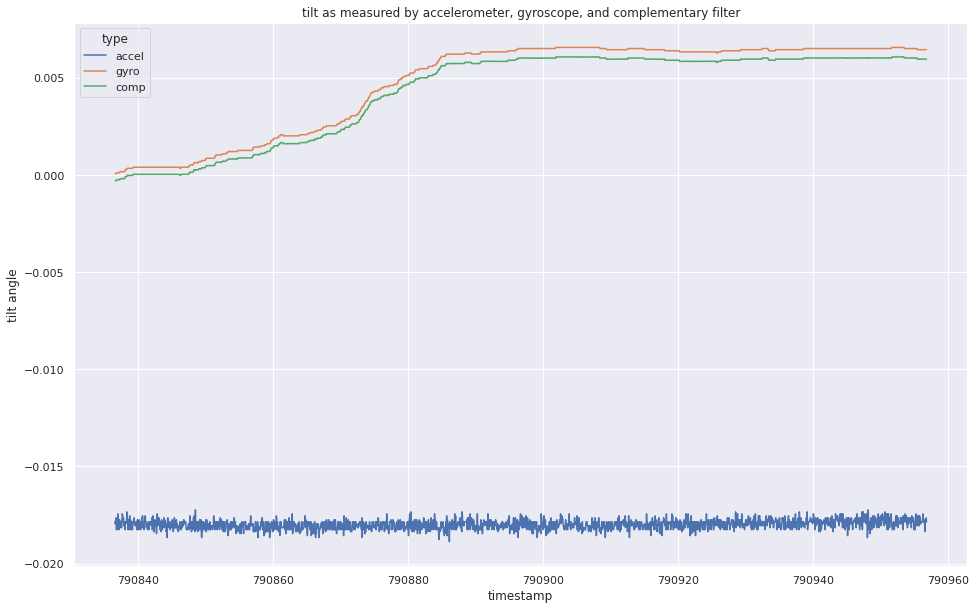

In [78]:
plt.figure(figsize=(16, 10))
sns.lineplot(data=tilts_plot,
    x="timestamp", y="tilt angle", hue="type").set_title("tilt as measured by accelerometer, gyroscope, and complementary filter")